<a href="https://colab.research.google.com/github/oskarkon/dw_matrix_car/blob/master/dzie%C5%844.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import os
import datetime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten,Dropout
from tensorflow.keras.utils import to_categorical
%tensorflow_version 1.x
#%load_ext tensorboard
import matplotlib.pyplot as plt
from skimage import color,exposure


TensorFlow is already loaded. Please restart the runtime to change versions.


In [28]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_tree/data/dw_matrix_road_sign/data'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_tree/data/dw_matrix_road_sign/data


In [0]:
train=pd.read_pickle('train.p')
test=pd.read_pickle('test.p')
X_train, y_train =train['features'], train['labels']
X_test,y_test=test['features'],test['labels']

In [0]:
if y_train.ndim ==1: y_train=to_categorical(y_train)
if y_test.ndim ==1: y_test=to_categorical(y_test)

In [0]:
input_shape=X_train.shape[1:]
num_classes = y_train.shape[1]

In [32]:
model=Sequential([
   Conv2D(filters=64, kernel_size=(3,3),activation='relu',input_shape=input_shape),               

    Flatten(),

    Dense(num_classes, activation='softmax'),
])
#model.summary()
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

model.fit(X_train,y_train)

1088/1088 [==============================] - 4s 4ms/step - loss: 10.1017 - accuracy: 0.7969


In [0]:
def get_cnn_v1(input_shape,num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3,3),activation='relu',input_shape=input_shape),               

    Flatten(),

    Dense(num_classes, activation='softmax'),
    ])
def train_model(model, X_train,y_train,params_fit={}):
    model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

    logdir=os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback=tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)
    
    
    model.fit(
        X_train,
        y_train,
        batch_size=params_fit.get('batch_size',128),
        epochs=params_fit.get('epochs',5),
        verbose=params_fit.get('verbose',1),
        validation_data=params_fit.get('validation_data',(X_train,y_train)),
        callbacks=[tensorboard_callback]
        
        
    )
    return model

In [34]:
model=get_cnn_v1(input_shape,num_classes)
model_trained=train_model(model, X_train,y_train)

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 23.9651 - accuracy: 0.7336 - val_loss: 0.2452 - val_accuracy: 0.9429
Epoch 2/5
272/272 [==============================] - 3s 10ms/step - loss: 0.2055 - accuracy: 0.9526 - val_loss: 0.0889 - val_accuracy: 0.9792
Epoch 3/5
272/272 [==============================] - 3s 10ms/step - loss: 0.1194 - accuracy: 0.9728 - val_loss: 0.1004 - val_accuracy: 0.9786
Epoch 4/5
272/272 [==============================] - 3s 10ms/step - loss: 0.1163 - accuracy: 0.9741 - val_loss: 0.1602 - val_accuracy: 0.9667
Epoch 5/5
272/272 [==============================] - 3s 10ms/step - loss: 0.1013 - accuracy: 0.9776 - val_loss: 0.0897 - val_accuracy: 0.9786


In [35]:
y_pred_prob=model_trained.predict(X_test)
y_pred_prob

array([[2.3804986e-11, 5.6107408e-10, 4.0781517e-11, ..., 6.1432238e-06,
        9.9965513e-01, 3.1353394e-04],
       [3.0064858e-14, 5.2251697e-10, 1.1729548e-10, ..., 5.6957924e-07,
        9.8809564e-01, 4.4362722e-09],
       [2.8039596e-14, 2.3690132e-12, 1.0348234e-11, ..., 5.9004623e-09,
        9.9958760e-01, 5.5285953e-11],
       ...,
       [0.0000000e+00, 3.8904746e-24, 1.5306006e-28, ..., 2.5805015e-28,
        2.0053188e-33, 0.0000000e+00],
       [6.9700271e-24, 1.0741275e-18, 2.8258836e-17, ..., 1.4982098e-21,
        2.3348531e-17, 1.7154399e-29],
       [2.2789960e-36, 2.4563532e-15, 2.8027321e-21, ..., 1.4478674e-20,
        2.8449055e-27, 1.1120927e-29]], dtype=float32)

In [36]:
y_pred_prob[400]

array([0.00539502, 0.01304396, 0.10297614, 0.00860378, 0.01218118,
       0.01426175, 0.01247867, 0.05080529, 0.02803406, 0.00790482,
       0.00200723, 0.01251675, 0.00827692, 0.00300857, 0.00123554,
       0.00446488, 0.00720034, 0.00193352, 0.00684646, 0.01291629,
       0.00403183, 0.02357724, 0.02881877, 0.01535558, 0.00748405,
       0.00503659, 0.01457622, 0.01771958, 0.03536954, 0.02183314,
       0.02916785, 0.20239146, 0.0007656 , 0.06622211, 0.0104902 ,
       0.02192611, 0.00354983, 0.01832721, 0.01698926, 0.03015568,
       0.08745376, 0.01405066, 0.00861648], dtype=float32)

In [45]:
np.argmax(y_pred_prob[400])

31

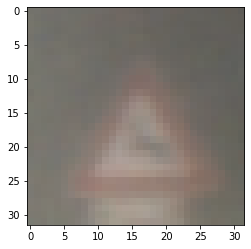

In [37]:
plt.imshow(X_test[400])  

In [40]:
ls


dw_matrix_road_sign/  logs/  signnames.csv  test.p  train.p


In [0]:
df=pd.read_csv('signnames.csv')
labeles_dict=df.to_dict()['b']